9.3.1  Writing to a Text File: Introducing the with Statement

In [1]:
with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')

9.3.1 Self Check 3

In [2]:
with open ('grades.txt', mode='w') as grades:
    grades.write('1 Red A\n')
    grades.write('2 Green B\n')
    grades.write('3 White A\n')

9.3.2 Reading Data from a Text File

In [3]:
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Accounts":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Accounts  Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


9.3.2 Self Check 3

In [5]:
with open('grades.txt', mode='r') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grades"}')
    for record in grades:
        student_id, name, grade = record.split()
        print(f'{student_id:<4}{name:<7}{grade}')

ID  Name   Grades
1   Red    A
2   Green  B
3   White  A


9.4 Updating Text Files

In [7]:
accounts = open('accounts.txt', 'r')

In [8]:
temp_file = open('temp_file.txt', 'w')

In [9]:
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')

In [10]:
import os

In [11]:
os.remove('accounts.txt')

In [12]:
os.rename('temp_file.txt', 'accounts.txt')

9.4 Self Check 3

In [17]:
accounts = open('accounts.txt', 'r')

In [18]:
temp_file = open('temp_file.txt', 'w')

In [19]:
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if name != 'Doe':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Smith', balance])
            temp_file.write(new_record + '\n')

In [20]:
import os

In [21]:
os.remove('accounts.txt')

In [22]:
os.rename('temp_file.txt', 'accounts.txt')

9.5 Serialization with JSON

In [1]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [2]:
import json

In [3]:
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [6]:
with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)

In [7]:
accounts_json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [8]:
accounts_json['accounts']

[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Doe', 'balance': 345.67}]

In [9]:
accounts_json['accounts'][0]

{'account': 100, 'name': 'Jones', 'balance': 24.98}

In [10]:
accounts_json['accounts'][1]

{'account': 200, 'name': 'Doe', 'balance': 345.67}

In [11]:
with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))

{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Doe",
            "balance": 345.67
        }
    ]
}


9.5 Self Check 3

In [12]:
import json

In [13]:
grades_dict = {'gradebook':
    [{'student_id': 1, 'name': 'Red', 'grade': 'A'},
     {'student_id': 2, 'name': 'Green', 'grade': 'B'},
     {'student_id': 3, 'name': 'White', 'grade': 'A'}]}

In [14]:
with open('grades.json', 'w') as grades:
    json.dump(grades_dict, grades)

In [15]:
with open('grades.json', 'r') as grades:
    print(json.dumps(json.load(grades), indent=4))

{
    "gradebook": [
        {
            "student_id": 1,
            "name": "Red",
            "grade": "A"
        },
        {
            "student_id": 2,
            "name": "Green",
            "grade": "B"
        },
        {
            "student_id": 3,
            "name": "White",
            "grade": "A"
        }
    ]
}


9.8.1 Division by Zero and Invalid Input

In [16]:
10/0

ZeroDivisionError: division by zero

In [17]:
value = int(input('Enter an integer'))

Enter an integer hello


ValueError: invalid literal for int() with base 10: 'hello'

In [18]:
#divisionbyzero.py
"""Simple exception handling example."""

while True:
    #attempt to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError: #tried to convert non-numeric value to
        print('You must enter two integers\n')
    except ZeroDivisionError: #denominator was 0
        print('Attempted to divide by zero\n')
    else: #executes only if no exceptions occur
        print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
        break #terminate the loop

Enter numerator:  100
Enter denominator:  0


Attempted to divide by zero



Enter numerator:  100
Enter denominator:  hello


You must enter two integers



Enter numerator:  100
Enter denominator:  7


100.000 / 7.000 = 14.286


9.8.2 Self Check 3

In [19]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {int(value)}')

In [20]:
try_it(10.7)

int(10.7) is 10


In [21]:
try_it('Python')

Python could not be converted to an integer


9.9 finally Clause

In [22]:
try:
    print('try suite with no exceptions raise')
except:
    print('this will not execute')
else:
    print('else executes because no exceptions in the try suite')
finally:
    print('finally always executes')

try suite with no exceptions raise
else executes because no exceptions in the try suite
finally always executes


In [23]:
try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else:
    print('else will not execute because an exception occurred')
finally:
    print('finally always executes')

try suite that raises an exception
a ValueError occurred
finally always executes


In [24]:
open('gradez.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'gradez.txt'

In [25]:
#wrap a with statement in a try suite to catch exceptions like FileNotFoundError
try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}')
except FileNotFoundError:
    print('The file name you specified does not exist')

The file name you specified does not exist


9.9 Self Check 3

In [26]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {int(value)}')
    finally:
        print('finally executed')

In [27]:
try_it(10.7)

int(10.7) is 10
finally executed


In [28]:
try_it('Python')

Python could not be converted to an integer
finally executed


9.11 (Optional) Stack Unwinding and Tracebacks

In [32]:
def function1():
    function2()

In [33]:
def function2():
    raise Exception('An exception occurred')

In [34]:
function1()

Exception: An exception occurred

9.12 Intro to Data Science: Working w/ CSV Files

9.12.1 Python Standard Library Module CSV

In [35]:
import csv

In [36]:
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])

In [37]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White            0.0
400       Stone         -42.16
500       Rich          224.62


9.12.1 Self Check 1

In [38]:
with open('grades.csv', mode='w', newline='') as grades:
    writer = csv.writer(grades)
    writer.writerow([1, 'Red', 'A'])
    writer.writerow([2, 'Green', 'B'])
    writer.writerow([3, 'White', 'A'])

In [39]:
with open('grades.csv', 'r', newline='') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grade"}')
    reader = csv.reader(grades)
    for record in reader:
        student_id, name, grade = record
        print(f'{student_id:<4}{name:<7}{grade}')

ID  Name   Grade
1   Red    A
2   Green  B
3   White  A


9.12.2 Reading CSV Files into Pandas DataFrames

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('accounts.csv', names=['account', 'name', 'balance'])

In [3]:
df

,account,name,balance
0,100,Jones,24.98
1,200,Doe,345.67
2,300,White,0.00
3,400,Stone,-42.16
4,500,Rich,224.62


In [4]:
df.to_csv('accounts_from_dataframe.csv', index=False)

9.12.3 Reading the Titanic Disaster Dataset

In [5]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

In [6]:
pd.set_option('display.precision', 2) #format for floating-point, use display.precision as this is the
#newer way to specify precision

In [7]:
titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [8]:
titanic.tail()

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [9]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

In [10]:
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


9.12.4 Simple Data Analysis with the Titanic Disaster Dataset

titanic.describe()

In [12]:
(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

9.12.5 Passenger Age Histogram

In [13]:
%matplotlib inline

Zach Fullers Histogram


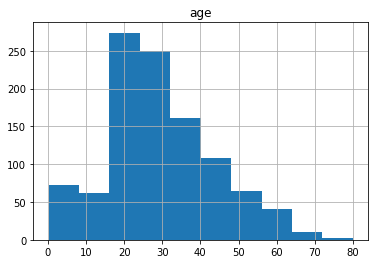

In [15]:
histogram = titanic.hist()
print('Zach Fullers Histogram')

9.12.5 Self Check 2

In [16]:
pd.read_csv('grades.csv', names=['ID', 'Name', 'Grade'])

,ID,Name,Grade
0,1,Red,A
1,2,Green,B
2,3,White,A
